#                                         **Customer Shopping Trend**

![Alt text](image.png)

#### **Import Liabraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("shopping_trends.csv",index_col=None)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [ ]:
df.isna().sum()  # we have findout that we dont have any null values

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**Q1: How many categpries are present in the Dataset and which one is the most popular ?**

In [ ]:
print(df['Category'].unique())

['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In the dataset, there are **four** categories available

In [ ]:
print(df['Category'].value_counts())

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


and clearly **clothing** is the most popular one

Text(0.5, 0, 'Name of the category')

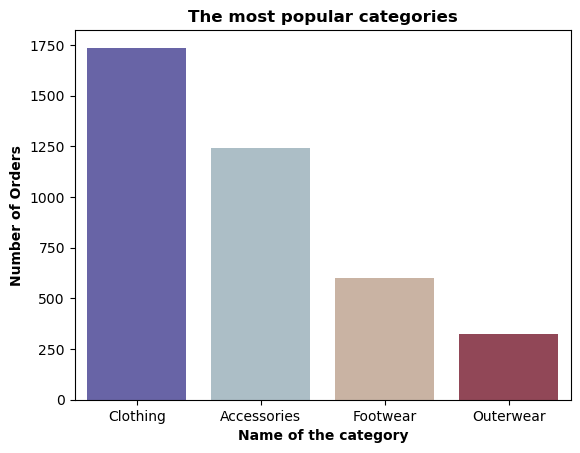

In [ ]:
sns.barplot(data = df, y = df['Category'].value_counts() , x = df['Category'].value_counts().index,palette='twilight_shifted')

plt.title('The most popular categories', fontweight = 'bold')
plt.ylabel('Number of Orders', fontweight = 'bold')
plt.xlabel('Name of the category', fontweight = 'bold')

**Q2: Which age group has the highest spending or purchase activity in the dataset?**

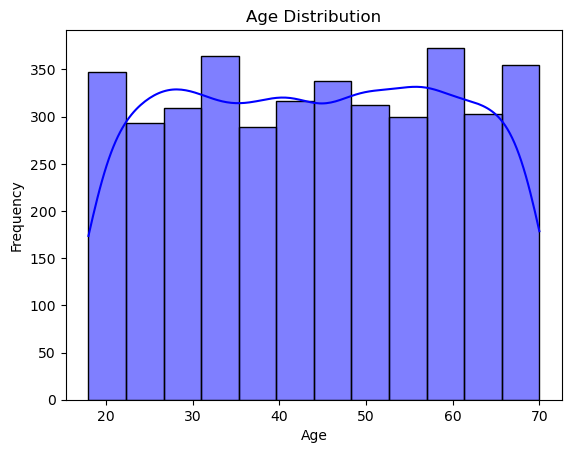

In [ ]:
bin_edges = [10, 20, 30, 40, 50,60,70,80,90,100]
bin_labels = ['10', '20','30','40','50','60','70','80','90']

# Create a new column 'Age Group' with bins
df['Age Group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

# Create a histogram
sns.histplot(data=df, x='Age', bins=12, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the histogram
plt.show()



**Q3: Which gender has the highest spending or purchase activity in the dataset?**

In [ ]:
df['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

Text(0.5, 0, 'Gender')

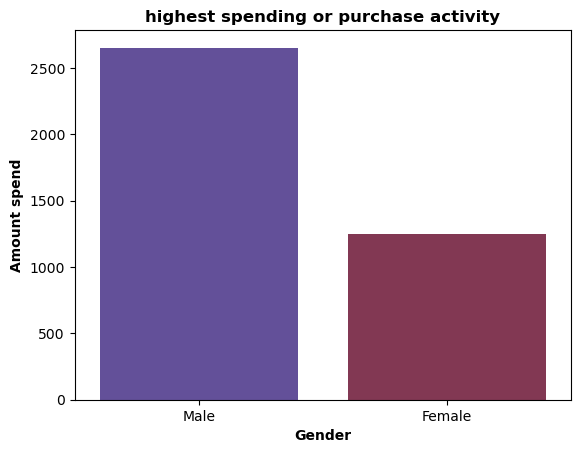

In [ ]:
sns.barplot(data = df, y = df['Gender'].value_counts() , x = df['Gender'].value_counts().index,palette='twilight')

plt.title('highest spending or purchase activity', fontweight = 'bold')
plt.ylabel('Amount spend', fontweight = 'bold')
plt.xlabel('Gender', fontweight = 'bold')

The insights reveal that males tend to spend more money on shopping compared to females.

**Q4: What are different "Payment methods" and "Preferred Payment Method" in a data set ?**

In [52]:
df['Payment Method'].value_counts()

Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: Payment Method, dtype: int64

<Axes: >

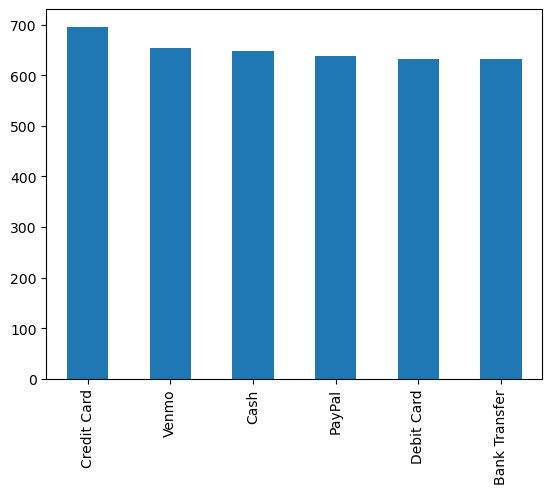

In [59]:
df['Payment Method'].value_counts().plot(kind='bar')

In [53]:
df['Preferred Payment Method'].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Preferred Payment Method, dtype: int64

<Axes: >

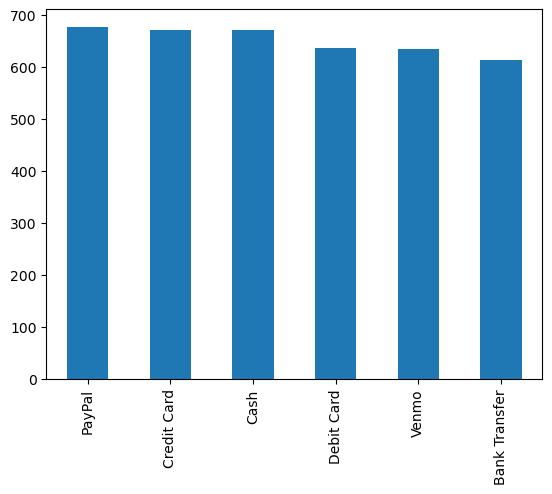

In [60]:
df['Preferred Payment Method'].value_counts().plot(kind='bar')

In [55]:

contingency_table = pd.crosstab(df['Payment Method'], df['Preferred Payment Method'])

# Display the contingency table
contingency_table

Preferred Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Payment Method,,,,,,
Bank Transfer,103,107,123,104,101,94
Cash,97,120,116,91,116,108
Credit Card,119,122,96,124,126,109
Debit Card,103,105,118,87,106,114
PayPal,96,112,96,116,110,108
Venmo,94,104,122,114,118,101


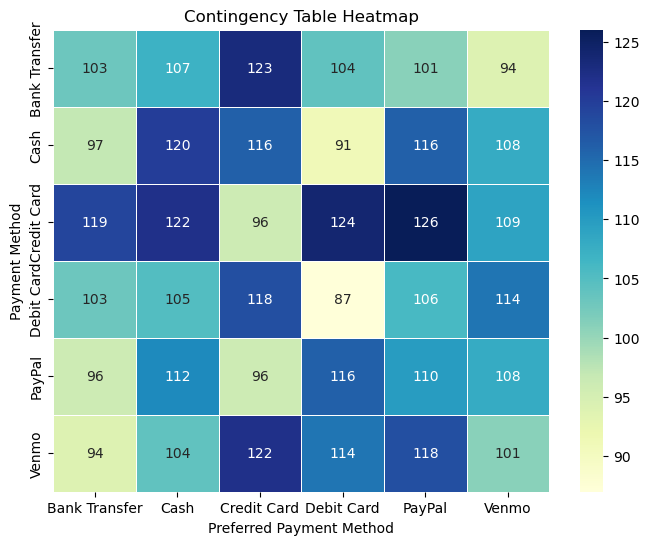

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)

# Display the heatmap
plt.title("Contingency Table Heatmap")
plt.show()

**Q5: Find out the most popular and least popular itmes ?**

In [61]:
df['Item Purchased'].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

Text(0, 0.5, 'Categories')

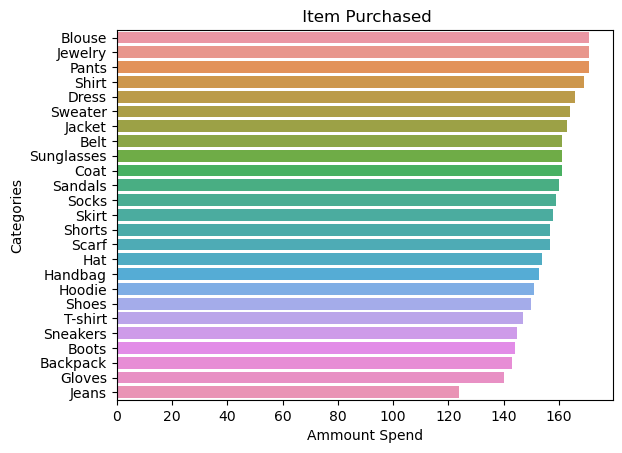

In [65]:
sns.barplot(data=df,x=df['Item Purchased'].value_counts(),y=df['Item Purchased'].value_counts().index)
plt.title(" Item Purchased")
plt.xlabel("Ammount Spend")
plt.ylabel("Categories")

The top 3 most popular products are:

Blouse - 171
Jewelry - 171
Pants - 171

The top 3 least popular products are:

Jeans - 124
Gloves - 140
Backpack - 143

**Q6:How much money spend in each Category ?**

In [74]:
sum_category=df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
sum_category.sort_values(by='Purchase Amount (USD)', ascending=False)


,Category,Purchase Amount (USD)
1,Clothing,104264
0,Accessories,74200
2,Footwear,36093
3,Outerwear,18524
